In [185]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from skimage import io
import math

### 1. We know that speech signal is one dimensional vector. Different vector transformations can be applied on the speech signal to enhance its quality. Explore the following vector transformations on the speech signal.

1. Record your voice signal for 30 seconds (speak slow and record) and play it in python.

In [3]:
!pip install sounddevice

In [4]:
import sounddevice as sd

In [9]:
duration=30
fs=8000  #44000Hhz
my_record=sd.rec(fs*duration,samplerate=fs,channels=1)
sd.wait()

In [21]:
sd.play(my_record,fs)
print("Please note that I spoke the numbers 1 to 10 within the 30 seconds of recording time")

Please note that I spoke the numbers 1 to 10 within the 30 seconds of recording time


2. Print the shape of the signal. Is it a 1D vector ?

In [18]:
print("My voice recording shape:", my_record.shape)
print('It is an one dimensional (1-D) vector')

My voice recording shape: (240000, 1)
It is an one dimensional (1-D) vector


3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

10 words were actually spoken and the visualization also shows 10 words


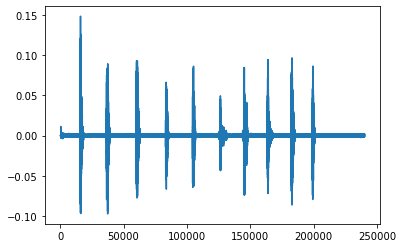

In [19]:
plt.plot(my_record)
print('10 words were actually spoken and the visualization also shows 10 words')

4. Take only the first 15 seconds of your speech signal

In [22]:
trim_record = my_record[:fs*15]
sd.play(trim_record,fs)

5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [25]:
sd.play(my_record,4000)

6. Upsample the speech vector by 2 (Introduce one sample newly between every two sample)

In [24]:
sd.play(my_record,16000)

7. Apply the following transformations on the speech signal and try to hear to

a. 3*Speech signal

In [28]:
vr1 = 3 * my_record
sd.play(vr1,fs)

b. 0.5*Speech signal

In [29]:
vr2 = 0.5 * my_record
sd.play(vr2,fs)

c. exp(0.5*speech signal)

In [45]:
vr3 = [math.exp(x) for x in my_record]
sd.play(vr3,fs)

d. ln(speech signal)

e. Cos (Speech Signal)

In [190]:
vr5 = [math.cos(x) for x in my_record]
sd.play(vr5,fs)

f. Speech signal + normal_random_noise of same length of speech signal

In [171]:
random_noise = np.random.random([240000, 1])

vr6 = my_record + random_noise
sd.play(vr6,fs)

### 2. We know that image is a 2D data, which is nothing but a matrix. Apply different matrix transformations on the following image.

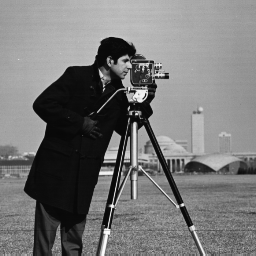

In [110]:
img = Image.open('cameraman.png')
img

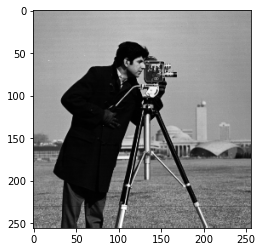

In [111]:
imgarr = plt.imread('cameraman.png')
imgarr

plt.imshow(imgarr, cmap='gray')

1.	Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question.

2 Pockets are visible in the cameraman's coat


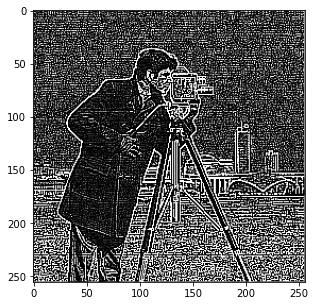

In [113]:
img = Image.open('cameraman.png')

enhance = img.filter(ImageFilter.EDGE_ENHANCE_MORE)

edge = enhance.filter(ImageFilter.FIND_EDGES)
edge

plt.figure(figsize=(5,5))
plt.imshow(edge, cmap='gray')
print("2 Pockets are visible in the cameraman's coat")

2.	Create the negative version of this image

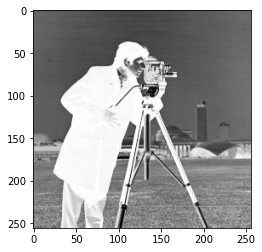

In [114]:
img = Image.open('cameraman.png')

img_neg = 255 - imgarr
plt.imshow(img_neg, cmap='gray')

3.	Rotate the image by an angles 45deg, 90 deg.

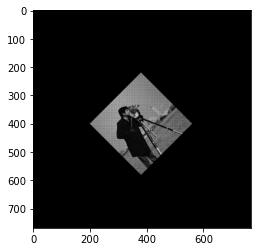

In [178]:
img = io.imread('cameraman.png')

def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

img_trans = np.zeros((img.shape[0]*3, img.shape[1]*3), dtype=np.uint8)

R45 = get_rotation(45)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R45,input_coords).astype(int)
        img_trans[i_out+400, j_out+200] = pixel_data

plt.imshow(img_trans, cmap='gray')

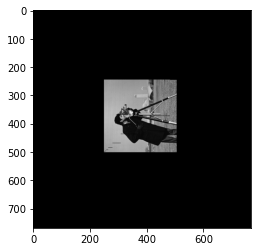

In [179]:
img = io.imread('cameraman.png')

def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

img_trans = np.zeros((img.shape[0]*3, img.shape[1]*3), dtype=np.uint8)

R90 = get_rotation(90)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R90,input_coords).astype(int)
        img_trans[i_out+500, j_out+250] = pixel_data

plt.imshow(img_trans, cmap='gray')

4.	Horizontally flip the image

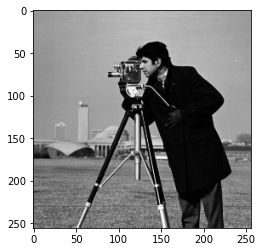

In [180]:
img = io.imread('cameraman.png')

img_trans = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

R_hflip = np.array([[1,0,0],[0,-1,0],[0,0,1]])

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R_hflip,input_coords).astype(int)
        img_trans[i_out, j_out] = pixel_data

plt.imshow(img_trans, cmap='gray')

5.	Zoom out the image using any matrix interpolation (up-sampling)

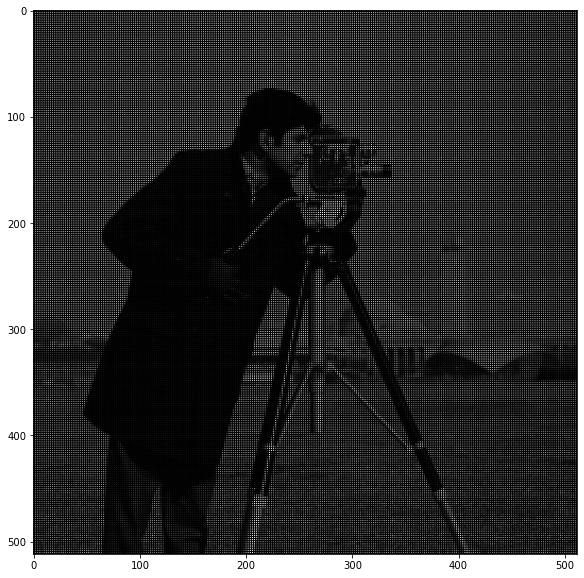

In [181]:
img = io.imread('cameraman.png')

img_trans = np.zeros((img.shape[0]*2, img.shape[1]*2), dtype=np.uint8)

zoom = np.array([[2,0,0],[0,2,0],[0,0,1]])

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(zoom,input_coords)
        img_trans[i_out, j_out] = pixel_data
        
plt.figure(figsize=(10, 10))
plt.imshow(img_trans, cmap='gray')

### 3. Lung_Feat.csv is a dataset of features extracted from the lung nodules(tumors). Refer the below article to understand about these features and its extraction process from CT scan.  https://www.scielo.br/j/babt/a/GCTFby9bSBLsynRm44hZYNB/?lang=en

This data consist of 24 columns, in which the first 23 columns are defining the tumor shape and texture characteristics. Apply the dimensionality reduction technique to derive the new fewer feature components to represent the original tumor characteristics without losing more than 5 percent of information. Also list the top 5 features in the first five principle components. 

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [128]:
df1 = pd.read_csv('Lung_Feat.csv')
df1

Area   diameter  perimeter  circularity  homogeneity  compactness  \
0     61.875000  12.000000  32.077140     0.755673   449.718750     1.345392   
1     14.062500   7.500000  16.749615     0.629887    56.306250     1.615692   
2     11.812500  15.750000  13.560380     0.807250   127.968750     1.574249   
3     20.250000   9.750000  21.604931     0.545166   258.862500     1.529404   
4     13.500000  11.250000  15.744046     0.684401   127.237500     1.334365   
..          ...        ...        ...          ...          ...          ...   
950  140.155313  26.060625  54.991102     0.418325  1632.380344     1.415204   
951   97.250625  17.797500  54.577535     0.294682   875.684672     1.466552   
952   93.913594  13.348125  34.769701     0.701158   709.595859     1.376667   
953   25.742812   5.720625  16.605739     0.842614    81.185203     1.192730   
954  119.179688  12.712500  37.326359     0.772076   945.714656     1.239462   

     homogeneity.1  3d bounding box dim rate  compactness2  clbp mean  ...  \
0         1.000000                  0.758333      2.339759  14.650000  ...   
1         0.900000                  0.693333      2.105107   7.850000  ...   
2         0.333333                  0.333333      3.415881  11.400000  ...   
3         0.923077                  0.494505      3.196538  15.316667  ...   
4         0.866667                  0.693333      3.898952  13.400000  ...   
..             ...                       ...           ...        ...  ...   
950       0.516768                  0.394122      2.624082  23.701750  ...   
951       0.635625                  0.635625      7.674249  28.009875  ...   
952       0.605357                  0.559619      1.348210  11.992125  ...   
953       0.753333                  0.489667      0.934562   4.703625  ...   
954       0.720375                  0.661050      1.090600  11.568375  ...   

        energy  skew inside  kurtosis inside    moment 2         MIP  \
0    10.149219     0.462735         3.076589  238.764450  276.318695   
1     5.401159     0.182834         1.547886  313.565430  318.816223   
2     5.017380     0.095425         1.444559  331.105621  275.847107   
3     4.719527    -0.396786         1.803046  196.050644  245.214554   
4     5.003018    -0.555117         2.040902  315.546234  252.875107   
..         ...          ...              ...         ...         ...   
950   2.595602     0.077089         1.968552  147.351006  187.634361   
951   6.997040    -0.086573         1.845774  133.118939  227.202522   
952   1.870938    -0.777520         2.167014  104.375659  148.932374   
953   2.028066    -0.449440         1.724977  345.055249  257.867678   
954   1.712471    -0.932449         3.536117  273.720154  280.143235   

         moment 5      moment 6      moment 7  x-y plane bb rate  \
0     65971.18750  1.575287e+07  3.681973e+05          19.111872   
1     99969.98438  3.134799e+07  1.327357e+04          19.048378   
2     91334.75781  3.024172e+07  1.102121e+04          19.080124   
3     48072.80469  9.425374e+06  2.239375e+04          19.111872   
4     79794.33594  2.517971e+07  1.348662e+04          19.080124   
..            ...           ...           ...                ...   
950   32620.65571  5.673153e+06  9.594963e+05           8.043876   
951   35688.02637  5.609722e+06  1.271180e+06          23.307611   
952   18343.70713  2.261300e+06  4.971556e+05           9.369557   
953  104990.73000  4.274701e+07  3.699339e+04           9.701880   
954   90468.83728  2.921980e+07  9.296061e+05          10.542527   

                 T  
0    NON-CANCEROUS  
1    NON-CANCEROUS  
2    NON-CANCEROUS  
3    NON-CANCEROUS  
4    NON-CANCEROUS  
..             ...  
950      CANCEROUS  
951      CANCEROUS  
952      CANCEROUS  
953      CANCEROUS  
954      CANCEROUS  

[955 rows x 24 columns]

In [129]:
df_features = df1.drop('T', axis=1)
df_features

Area   diameter  perimeter  circularity  homogeneity  compactness  \
0     61.875000  12.000000  32.077140     0.755673   449.718750     1.345392   
1     14.062500   7.500000  16.749615     0.629887    56.306250     1.615692   
2     11.812500  15.750000  13.560380     0.807250   127.968750     1.574249   
3     20.250000   9.750000  21.604931     0.545166   258.862500     1.529404   
4     13.500000  11.250000  15.744046     0.684401   127.237500     1.334365   
..          ...        ...        ...          ...          ...          ...   
950  140.155313  26.060625  54.991102     0.418325  1632.380344     1.415204   
951   97.250625  17.797500  54.577535     0.294682   875.684672     1.466552   
952   93.913594  13.348125  34.769701     0.701158   709.595859     1.376667   
953   25.742812   5.720625  16.605739     0.842614    81.185203     1.192730   
954  119.179688  12.712500  37.326359     0.772076   945.714656     1.239462   

     homogeneity.1  3d bounding box dim rate  compactness2  clbp mean  ...  \
0         1.000000                  0.758333      2.339759  14.650000  ...   
1         0.900000                  0.693333      2.105107   7.850000  ...   
2         0.333333                  0.333333      3.415881  11.400000  ...   
3         0.923077                  0.494505      3.196538  15.316667  ...   
4         0.866667                  0.693333      3.898952  13.400000  ...   
..             ...                       ...           ...        ...  ...   
950       0.516768                  0.394122      2.624082  23.701750  ...   
951       0.635625                  0.635625      7.674249  28.009875  ...   
952       0.605357                  0.559619      1.348210  11.992125  ...   
953       0.753333                  0.489667      0.934562   4.703625  ...   
954       0.720375                  0.661050      1.090600  11.568375  ...   

     DC constant     energy  skew inside  kurtosis inside    moment 2  \
0       1.001611  10.149219     0.462735         3.076589  238.764450   
1       1.002350   5.401159     0.182834         1.547886  313.565430   
2       1.002419   5.017380     0.095425         1.444559  331.105621   
3       1.002237   4.719527    -0.396786         1.803046  196.050644   
4       0.980073   5.003018    -0.555117         2.040902  315.546234   
..           ...        ...          ...              ...         ...   
950     0.854651   2.595602     0.077089         1.968552  147.351006   
951     0.848391   6.997040    -0.086573         1.845774  133.118939   
952     0.853556   1.870938    -0.777520         2.167014  104.375659   
953     0.853848   2.028066    -0.449440         1.724977  345.055249   
954     0.852340   1.712471    -0.932449         3.536117  273.720154   

            MIP      moment 5      moment 6      moment 7  x-y plane bb rate  
0    276.318695   65971.18750  1.575287e+07  3.681973e+05          19.111872  
1    318.816223   99969.98438  3.134799e+07  1.327357e+04          19.048378  
2    275.847107   91334.75781  3.024172e+07  1.102121e+04          19.080124  
3    245.214554   48072.80469  9.425374e+06  2.239375e+04          19.111872  
4    252.875107   79794.33594  2.517971e+07  1.348662e+04          19.080124  
..          ...           ...           ...           ...                ...  
950  187.634361   32620.65571  5.673153e+06  9.594963e+05           8.043876  
951  227.202522   35688.02637  5.609722e+06  1.271180e+06          23.307611  
952  148.932374   18343.70713  2.261300e+06  4.971556e+05           9.369557  
953  257.867678  104990.73000  4.274701e+07  3.699339e+04           9.701880  
954  280.143235   90468.83728  2.921980e+07  9.296061e+05          10.542527  

[955 rows x 23 columns]

In [130]:
pca = PCA(n_components=15)

In [150]:
x = StandardScaler().fit_transform(df_features[df_features.columns].values)
pca_result = pca.fit_transform(x)

print("PCA Explained Variance:\n",pca.explained_variance_ratio_)
print("\nCumulative Variance:\n",np.cumsum(pca.explained_variance_ratio_))
print('\n15 PCA components should be good to cover more than 99% of data variance')

PCA Explained Variance:
 [0.34464486 0.17039782 0.11481225 0.08476391 0.06887346 0.0502925
 0.04201717 0.03571407 0.02189207 0.01900879 0.01145486 0.00822359
 0.00778559 0.00614516 0.00461627]

Cumulative Variance:
 [0.34464486 0.51504268 0.62985493 0.71461884 0.7834923  0.8337848
 0.87580198 0.91151604 0.93340811 0.95241691 0.96387177 0.97209535
 0.97988094 0.9860261  0.99064237]

15 PCA components should be good to cover more than 99% of data variance


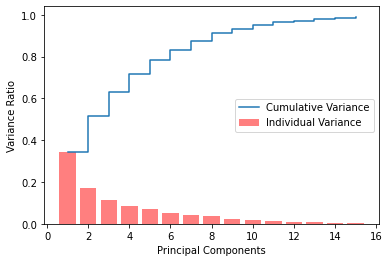

In [191]:
plt.bar(range(1,16), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Variance', color='red')
plt.step(range(1,16),np.cumsum(pca.explained_variance_ratio_), where= 'post', label='Cumulative Variance')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'center right')
plt.show()